In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('ratings _1_.csv')

In [3]:
data=pd.read_csv('movies.csv')
data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
df

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [5]:
df['userId'].nunique()

7120

In [6]:
df['movieId'].nunique()

14026

In [7]:
len(df['movieId'])

1048575

In [8]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [9]:
df[df['rating']<=2]

,userId,movieId,rating,timestamp
186,2,891,2.0,974820969
203,2,1969,2.0,974820969
204,2,1970,2.0,974820969
205,2,1971,2.0,974820943
206,2,1972,2.0,974820969
...,...,...,...,...
1048493,7118,2791,2.0,974564425
1048510,7119,45,2.0,834333382
1048513,7119,95,2.0,834332856
1048520,7119,231,2.0,834332595


In [10]:
#rating more than 2.0
1048575-137111

911464

In [11]:
rating_grp=df.groupby('rating')['rating'].agg(['count'])

In [12]:
ratings=rating_grp.sort_values('rating',ascending=False)


In [13]:
ratings=ratings.reset_index()

<Axes: xlabel='rating', ylabel='count'>

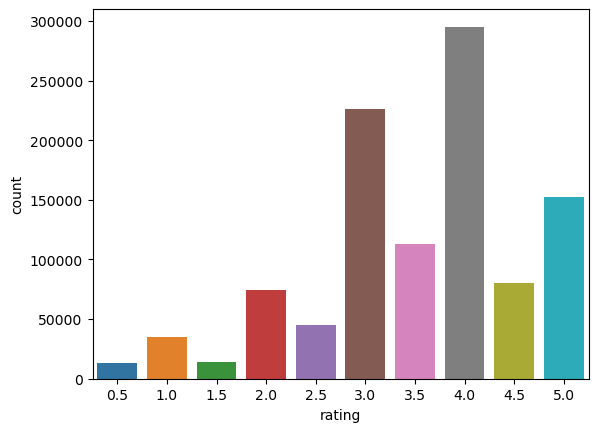

In [14]:
sns.barplot(x=ratings['rating'],y=ratings['count'])

In [15]:
df.groupby('movieId').agg(['count','mean'])

userId              rating           timestamp              
         count         mean  count      mean     count          mean
movieId                                                             
1         2569  3528.748151   2569  3.959323      2569  1.051306e+09
2         1155  3520.225974   1155  3.268398      1155  1.037534e+09
3          685  3580.858394    685  3.186861       685  9.622294e+08
4          138  3765.543478    138  3.000000       138  9.337009e+08
5          657  3418.366819    657  3.143836       657  9.629729e+08
...        ...          ...    ...       ...       ...           ...
130073       1  4450.000000      1  2.500000         1  1.427592e+09
130219       1  1339.000000      1  4.500000         1  1.426852e+09
130462       1  5731.000000      1  4.000000         1  1.427218e+09
130490       2  2910.000000      2  2.250000         2  1.427190e+09
130642       1  3858.000000      1  3.000000         1  1.427139e+09

[14026 rows x 6 columns]

In [16]:
rating_summary=df.groupby('movieId')['rating'].agg(['count','mean'])

In [17]:
users_summary=df.groupby('userId').agg(['count','mean'])

In [18]:
users_summary

movieId              rating           timestamp              
         count         mean  count      mean     count          mean
userId                                                              
1          175  3428.537143    175  3.742857       175  1.107833e+09
2           61  2098.524590     61  4.000000        61  9.748208e+08
3          187  1698.331551    187  4.122995       187  9.450063e+08
4           28   394.964286     28  3.571429        28  8.408791e+08
5           66   574.484848     66  4.272727        66  8.515452e+08
...        ...          ...    ...       ...       ...           ...
7116       232  5149.336207    232  3.797414       232  1.139490e+09
7117       188   933.654255    188  3.936170       188  9.030524e+08
7118        40  1925.950000     40  4.075000        40  9.745649e+08
7119        50   315.280000     50  3.740000        50  8.343329e+08
7120        20   114.000000     20  4.125000        20  1.175787e+09

[7120 rows x 6 columns]

In [19]:
rating_benchmark=rating_summary['count'].quantile(0.6)

In [20]:
rating_benchmark

16.0

In [21]:
user_benchmark=users_summary['rating']['count'].quantile(0.6)

In [22]:
drop_user_list=users_summary[users_summary['rating']['count']<user_benchmark].index

In [23]:
drop_movie_list=rating_summary[rating_summary['count']<rating_benchmark].index

In [30]:
final_dataset=df.drop(index=df.index[df.index.isin(drop_user_list)])

final_dataset=df.drop(index=df.index[df.index.isin(drop_movie_list)])

#8337 rows has been removed from the df dataset
final_dataset.shape

(1040238, 4)

In [38]:
final_dataset

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1048570,7120,168,5.0,1175543061
1048571,7120,253,4.0,1175542225
1048572,7120,260,5.0,1175542035
1048573,7120,261,4.0,1175543376


In [32]:
#conda install -c conda-forge scikit-surprise

In [36]:
from surprise.model_selection import cross_validate
from surprise import SVD,Reader,Dataset


In [37]:
svd=SVD()
reader=Reader()


In [42]:
df=Dataset.load_from_df(final_dataset[['userId','movieId','rating']],reader)


In [44]:
cross_validate(svd,df,measures=['MAE','RMSE'],cv=3,verbose=True)

Evaluating MAE, RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
MAE (testset)     0.6477  0.6478  0.6479  0.6478  0.0001  
RMSE (testset)    0.8462  0.8451  0.8456  0.8456  0.0004  
Fit time          17.44   21.64   23.83   20.97   2.65    
Test time         9.98    8.94    7.44    8.79    1.04    


{'test_mae': array([0.64770916, 0.64779709, 0.64791491]),
 'test_rmse': array([0.84617031, 0.84508155, 0.84562511]),
 'fit_time': (17.44257640838623, 21.63804316520691, 23.831225633621216),
 'test_time': (9.980310678482056, 8.94162893295288, 7.4355385303497314)}

In [48]:
final_dataset[final_dataset['rating']==5.0]

,userId,movieId,rating,timestamp
158,1,7153,5.0,1112484633
170,1,8507,5.0,1094786027
176,2,62,5.0,974820598
177,2,70,5.0,974820691
180,2,260,5.0,974821014
...,...,...,...,...
1048564,7120,110,5.0,1175542038
1048565,7120,141,5.0,1175542254
1048566,7120,151,5.0,1175542627
1048570,7120,168,5.0,1175543061


In [63]:
data_7120=final_dataset[(final_dataset['userId']==7120) & (final_dataset['rating']==5)]


In [64]:
data_7120

,userId,movieId,rating,timestamp
1048560,7120,21,5.0,1175542249
1048561,7120,34,5.0,1175542154
1048564,7120,110,5.0,1175542038
1048565,7120,141,5.0,1175542254
1048566,7120,151,5.0,1175542627
1048570,7120,168,5.0,1175543061
1048572,7120,260,5.0,1175542035


In [65]:
user_7120=data.copy()

In [66]:
user_7120

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [69]:
user_7120=user_7120[user_7120['movieId'].isin(drop_movie_list)]

In [70]:
user_7120['Estimated_rating']=user_7120['movieId'].apply(lambda x:svd.predict(7120,x).est)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11072\3389001068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_7120['Estimated_rating']=user_7120['movieId'].apply(lambda x:svd.predict(7120,x).est)


In [72]:
user_7120=user_7120.drop('genres',axis=1)

In [76]:
user_7120=user_7120.sort_values('Estimated_rating',ascending=False)

In [80]:
print('Recommended Movies : \n')
user_7120.head(5)

Recommended Movies : 



,movieId,title,Estimated_rating
5418,5515,Songs From the Second Floor (Sånger från andra...,4.808251
9066,26810,Bad Boy Bubby (1993),4.783236
5740,5839,My Father's Glory (La gloire de mon père) (1990),4.761008
1379,1412,Some Mother's Son (1996),4.721642
6949,7061,Dark Victory (1939),4.695346
